<a href="https://colab.research.google.com/github/mitil31/adult-income-project/blob/main/Adult_income_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score

In [57]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test


--2025-07-02 20:42:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘adult.data.1’

adult.data.1            [ <=>                ]   3.79M  --.-KB/s    in 0.09s   

2025-07-02 20:42:46 (44.0 MB/s) - ‘adult.data.1’ saved [3974305]

--2025-07-02 20:42:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘adult.test.1’

adult.test.1            [ <=>                ]   1.91M  --.-KB/s    in 0.06s   

2025-07-02 20:42:46 (32.3 MB/s) - ‘adult.test.1’ saved [2003153]

In [58]:
!head adult.data


39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

In [59]:
!head adult.test


|1x3 Cross validator
25, Private, 226802, 11th, 7, Never-married, Machine-op-inspct, Own-child, Black, Male, 0, 0, 40, United-States, <=50K.
38, Private, 89814, HS-grad, 9, Married-civ-spouse, Farming-fishing, Husband, White, Male, 0, 0, 50, United-States, <=50K.
28, Local-gov, 336951, Assoc-acdm, 12, Married-civ-spouse, Protective-serv, Husband, White, Male, 0, 0, 40, United-States, >50K.
44, Private, 160323, Some-college, 10, Married-civ-spouse, Machine-op-inspct, Husband, Black, Male, 7688, 0, 40, United-States, >50K.
18, ?, 103497, Some-college, 10, Never-married, ?, Own-child, White, Female, 0, 0, 30, United-States, <=50K.
34, Private, 198693, 10th, 6, Never-married, Other-service, Not-in-family, White, Male, 0, 0, 30, United-States, <=50K.
29, ?, 227026, HS-grad, 9, Never-married, ?, Unmarried, Black, Male, 0, 0, 40, United-States, <=50K.
63, Self-emp-not-inc, 104626, Prof-school, 15, Married-civ-spouse, Prof-specialty, Husband, White, Male, 3103, 0, 32, United-States, >50K.
24, 

In [60]:
train_df = pd.read_csv('adult.data', header=None)
test_df = pd.read_csv('adult.test', header=None, skiprows=1)


In [61]:
train_df.shape

(32561, 15)

In [62]:
test_df.shape

(16281, 15)

In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [64]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       16281 non-null  int64 
 1   1       16281 non-null  object
 2   2       16281 non-null  int64 
 3   3       16281 non-null  object
 4   4       16281 non-null  int64 
 5   5       16281 non-null  object
 6   6       16281 non-null  object
 7   7       16281 non-null  object
 8   8       16281 non-null  object
 9   9       16281 non-null  object
 10  10      16281 non-null  int64 
 11  11      16281 non-null  int64 
 12  12      16281 non-null  int64 
 13  13      16281 non-null  object
 14  14      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [65]:
train_df.describe(include=[object, int])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [66]:
train_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [67]:
test_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [68]:
my_cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train_df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [69]:
from os import times_result
cols = dict(zip(train_df.columns, my_cols))
train_df = train_df.rename(columns=cols)
test_df = test_df.rename(columns=cols)


In [70]:
train_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [71]:
test_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [72]:
x_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
x_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

In [73]:
#categorical variable handeling
temp_x = pd.concat([x_train, x_test], axis=0)
temp_x_new = pd.get_dummies(temp_x)

#train test split
x_train = temp_x_new[:x_train.shape[0]]
x_test = temp_x_new[x_train.shape[0]:]

In [74]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
y_pred = lr_clf.predict(x_test)

In [76]:
#handel a specific challenge that is having dot in test data
y_test = [label.rstrip('.') for label in y_test]

In [77]:
#evaluate LR
acc_lr = accuracy_score(y_test, y_pred)
fscr_lr = f1_score(y_test, y_pred, pos_label=' >50K')

In [78]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [79]:
y_pred = svc.predict(x_test)

In [80]:
#evaluate SVC
acc_svc = accuracy_score(y_test, y_pred)
fscr_svc = f1_score(y_test, y_pred, pos_label=' >50K')

In [81]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [82]:
y_pred = knn_clf.predict(x_test)

In [83]:
#evaluate KNN
acc_knn = accuracy_score(y_test, y_pred)
fscr_knn = f1_score(y_test, y_pred, pos_label=' >50K')

In [84]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_clf.predict(x_test)

In [86]:
#evaluate RF
acc_rf = accuracy_score(y_test, y_pred)
fscr_rf = f1_score(y_test, y_pred, pos_label=' >50K')

In [87]:
xgb_clf = XGBClassifier()

#convert labels to numeric
LE = LabelEncoder()
y_train = LE.fit_transform(y_train)
y_test = LE.transform(y_test)
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
y_pred = xgb_clf.predict(x_test)

In [89]:
#evaluate XGB
acc_xgb= accuracy_score(y_test, y_pred)
fscr_xgb = f1_score(y_test, y_pred)

In [90]:
#build a df for metrics result
metric_df = pd.DataFrame ({'models': ['LogReg', 'Svc', 'Knn', 'RanFor', 'Xgb'],
                           'accuracy': ['acc_lr', 'acc_svc', 'acc_knn', 'acc_rf', 'acc_xgb'],
                           'f1_score': [fscr_lr, fscr_svc, fscr_knn, fscr_rf, fscr_xgb]
                           })

In [91]:
metric_df = metric_df.sort_values('f1_score', ascending = False)

<Axes: xlabel='models'>

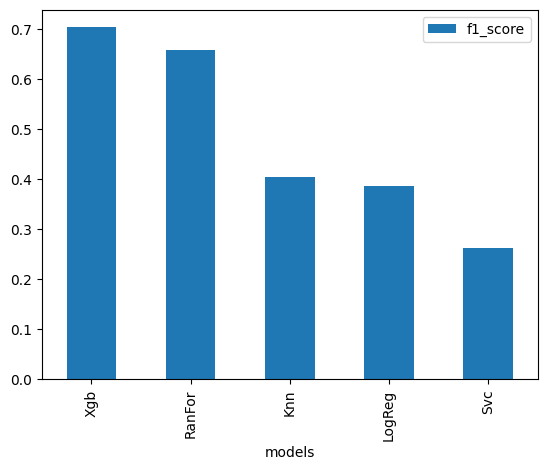

In [92]:
metric_df.plot(kind='bar', x='models', y=['accuracy', 'f1_score'])